In [1]:
"""Data importation"""

#1. import relative packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go
import seaborn as sns
import warnings
import os

%matplotlib inline

#2. import resource data and read sample
data_rTrain = pd.read_csv('QUB_Insurance_Data_Assignment_Training.csv')
data_rTrain.sample(10)
data_rTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4090 non-null   int64  
 1   Title                   4090 non-null   object 
 2   GivenName               4090 non-null   object 
 3   MiddleInitial           4090 non-null   object 
 4   Surname                 4090 non-null   object 
 5   CreditCardType          3368 non-null   object 
 6   Occupation              2534 non-null   object 
 7   Gender                  4090 non-null   object 
 8   Age                     4090 non-null   int64  
 9   Location                4090 non-null   object 
 10  MotorInsurance          4090 non-null   object 
 11  MotorValue              3361 non-null   float64
 12  MotorType               3361 non-null   object 
 13  HealthInsurance         4090 non-null   object 
 14  HealthType              2543 non-null   

In [2]:
"""Data cleaning"""

#1. glace over null and cleaning
data_cTrain = data_rTrain.copy(deep=True)
data_cTrain.info()
data_cleaning_Train = [data_cTrain]#用到了么

unob_bool = (data_cTrain.dtypes!='object')
unob_cols = list(unob_bool[unob_bool].index)

object_bool = (data_cTrain.dtypes=='object')
object_cols = list(object_bool[object_bool].index)

for i in unob_cols:
    data_cTrain[i] = data_cTrain[i].fillna(0)
for j in object_cols:
    data_cTrain[j] = data_cTrain[j].fillna('Nan')

data_cTrain.info()
data_cTrain.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4090 non-null   int64  
 1   Title                   4090 non-null   object 
 2   GivenName               4090 non-null   object 
 3   MiddleInitial           4090 non-null   object 
 4   Surname                 4090 non-null   object 
 5   CreditCardType          3368 non-null   object 
 6   Occupation              2534 non-null   object 
 7   Gender                  4090 non-null   object 
 8   Age                     4090 non-null   int64  
 9   Location                4090 non-null   object 
 10  MotorInsurance          4090 non-null   object 
 11  MotorValue              3361 non-null   float64
 12  MotorType               3361 non-null   object 
 13  HealthInsurance         4090 non-null   object 
 14  HealthType              2543 non-null   

,CustomerID,Title,GivenName,MiddleInitial,Surname,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
3292,4190,Mrs.,Amy,N,Cunningham,Visa,Bonus clerk,female,45,Urban,Yes,30791.0,Single,Yes,Level2,1.0,2.0,Yes,Standard,SMS
3508,4475,Mr.,Roan,E,Jones,Visa,Concrete finisher,male,20,Rural,Yes,30784.0,Bundle,Yes,Level1,0.0,0.0,Yes,Standard,Phone
316,418,Mr.,Josh,A,McDonald,AMEX,Nan,male,70,Rural,Yes,24333.0,Single,Yes,Level2,0.0,0.0,No,Nan,Phone
3188,4058,Mr.,Piotr,A,Smith,AMEX,Statistical assistant,male,55,Urban,Yes,15430.0,Single,No,Nan,0.0,0.0,Yes,Premium,Phone
451,595,Mrs.,Kirsten,M,Findlay,AMEX,Physical therapist aide,female,49,Rural,Yes,13556.0,Single,Yes,Level3,0.0,2.0,Yes,Standard,Phone
445,587,Mr.,Alfie,N,Morton,AMEX,Nan,male,49,Rural,Yes,16575.0,Single,Yes,Level2,1.0,2.0,Yes,Standard,Phone
746,965,Mrs.,Ruby,J,Collins,Nan,Nan,female,18,Rural,Yes,31486.0,Single,Yes,Level2,1.0,0.0,Yes,Premium,Email
338,446,Mrs.,Aimee-leigh,J,McIntyre,Visa,Light truck driver,female,48,Rural,Yes,17744.0,Single,Yes,Level1,1.0,2.0,No,Nan,Phone
670,877,Ms.,Lola,D,Banks,Nan,Nan,female,22,Rural,Yes,19842.0,Bundle,No,Nan,0.0,0.0,Yes,Premium,Email
3391,4327,Mr.,Mohammed,N,Lambert,AMEX,Press agent,male,54,Urban,Yes,34195.0,Single,Yes,Level1,0.0,3.0,Yes,Standard,Email


In [3]:
#2. glance over text-outliers and cleaning
for j in object_cols:
    result_j=pd.value_counts(data_cTrain[j])
    print(result_j,"\n","===="*20)

Mr.     1950
Ms.     1064
Mrs.     949
Dr.      127
Name: Title, dtype: int64 
Morgan     27
Charlie    23
Zachary    21
Scott      19
Oliver     19
           ..
Alix        1
Guy         1
Niall       1
Billie      1
Aiden       1
Name: GivenName, Length: 897, dtype: int64 
A    459
L    370
M    368
C    347
J    311
E    255
S    226
K    224
B    182
R    179
H    164
T    155
D    145
N    126
F    123
G    101
I     91
P     73
O     66
Z     55
V     24
Y     21
W     20
X      4
Q      1
Name: MiddleInitial, dtype: int64 
Henderson    38
Boyle        33
Reid         33
Bruce        32
Hamilton     32
             ..
Harrison      1
Hussain       1
Payne         1
Myers         1
Mills         1
Name: Surname, Length: 524, dtype: int64 
AMEX    1728
Visa    1640
Nan      722
Name: CreditCardType, dtype: int64 
Nan                          1556
HIV/AIDS nurse                  6
Desktop publishing editor       5
Social work planner             5
Training manager                5


In [4]:
#cleaning
data_cTrain['Gender'] = data_cTrain['Gender'].replace('f','female')
data_cTrain['Gender'] = data_cTrain['Gender'].replace('m','male')
data_cTrain['PrefChannel'] = data_cTrain['PrefChannel'].replace('E','Email')
data_cTrain['PrefChannel'] = data_cTrain['PrefChannel'].replace('P','Phone')
data_cTrain['PrefChannel'] = data_cTrain['PrefChannel'].replace('S','SMS')
#double check
result_Gender = pd.value_counts(data_cTrain['Gender'])
result_PrefChannel = pd.value_counts(data_cTrain['PrefChannel'])
print(result_Gender,"\n",
      "===========","\n",
      result_PrefChannel)

female    2077
male      2013
Name: Gender, dtype: int64 
 Email    1768
Phone    1565
SMS       757
Name: PrefChannel, dtype: int64


In [5]:
#3. glance over numarical-outliers and cleaning
for i in unob_cols:
    print(data_cTrain[i].describe(),"\n","========")

count    4090.000000
mean     2604.479218
std      1498.310160
min         1.000000
25%      1295.250000
50%      2594.500000
75%      3908.750000
max      5200.000000
Name: CustomerID, dtype: float64 
count    4090.000000
mean       41.391443
std        15.985643
min       -44.000000
25%        22.000000
50%        46.000000
75%        50.000000
max       210.000000
Name: Age, dtype: float64 
count      4090.000000
mean      19271.030073
std       14093.060034
min      -25686.000000
25%        5148.750000
50%       19736.500000
75%       30913.250000
max      325940.000000
Name: MotorValue, dtype: float64 
count    4090.000000
mean        0.507579
std         0.644837
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HealthDependentsAdults, dtype: float64 
count    4090.000000
mean        1.087042
std         1.217687
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         3.000000
Nam

In [6]:
#cleaning
data_cTrain = data_cTrain[data_cTrain['Age']>0]
data_cTrain = data_cTrain[data_cTrain['Age']<=100]
data_cTrain = data_cTrain[data_cTrain['MotorValue']>=0]
data_cTrain = data_cTrain[data_cTrain['MotorValue']<100000]
#double check
print(data_cTrain['Age'].describe())
print("===================\n",data_cTrain['MotorValue'].describe())
#refresh index
data_cTrain = data_cTrain.reset_index(drop=True)
data_cTrain

count    4083.000000
mean       41.333578
std        15.563479
min        18.000000
25%        22.000000
50%        46.000000
75%        50.000000
max        84.000000
Name: Age, dtype: float64
 count     4083.000000
mean     19195.688954
std      13116.509225
min          0.000000
25%       5152.000000
50%      19747.000000
75%      30912.500000
max      45374.000000
Name: MotorValue, dtype: float64


,CustomerID,Title,GivenName,MiddleInitial,Surname,CreditCardType,Occupation,Gender,Age,Location,MotorInsurance,MotorValue,MotorType,HealthInsurance,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelInsurance,TravelType,PrefChannel
0,1,Mrs.,Macy,A,Boyle,AMEX,Clinical laboratory technologist,female,23,Urban,No,0.0,Nan,No,Nan,0.0,0.0,Yes,Premium,SMS
1,2,Ms.,Thea,L,McIntosh,AMEX,Nan,female,44,Urban,No,0.0,Nan,Yes,Level1,2.0,3.0,No,Nan,Phone
2,4,Ms.,Murron,P,Miller,AMEX,Sheriff,female,19,Urban,Yes,4920.0,Bundle,No,Nan,0.0,0.0,No,Nan,SMS
3,5,Mr.,Kai,A,Henderson,Visa,Automotive painter,male,47,Rural,Yes,14994.0,Single,Yes,Level1,1.0,2.0,Yes,Business,Phone
4,11,Mrs.,Kayla,A,Brown,Visa,Risk manager,female,54,Rural,Yes,14605.0,Single,Yes,Level2,2.0,3.0,No,Nan,Email
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,5196,Mr.,Syed,K,Marshall,Visa,Marking and identification printing machine op...,male,68,Rural,No,0.0,Nan,Yes,Level3,1.0,0.0,No,Nan,Phone
4079,5197,Mrs.,Lily,O,Chapman,Visa,Meeting and convention planner,female,45,Urban,Yes,36429.0,Single,No,Nan,0.0,0.0,No,Nan,Email
4080,5198,Dr.,Mohammad,S,Butcher,Visa,Oxygen therapist,male,48,Rural,Yes,14206.0,Single,Yes,Level2,0.0,3.0,No,Nan,Email
4081,5199,Mr.,Kacper,C,Gordon,Visa,Accounts payable clerk,male,47,Urban,Yes,27251.0,Single,Yes,Level2,1.0,2.0,No,Nan,Email


In [7]:
# delete the useless features, according to the data exploration
drop_cTrain_cols = ['CustomerID','Title', 'GivenName', 'MiddleInitial', 'Surname',
                      'Occupation', 'MotorInsurance', 'HealthInsurance',
                      'TravelInsurance']
data_cTrain.drop(drop_cTrain_cols, axis=1, inplace=True)
data_cTrain

,CreditCardType,Gender,Age,Location,MotorValue,MotorType,HealthType,HealthDependentsAdults,HealthDependentsKids,TravelType,PrefChannel
0,AMEX,female,23,Urban,0.0,Nan,Nan,0.0,0.0,Premium,SMS
1,AMEX,female,44,Urban,0.0,Nan,Level1,2.0,3.0,Nan,Phone
2,AMEX,female,19,Urban,4920.0,Bundle,Nan,0.0,0.0,Nan,SMS
3,Visa,male,47,Rural,14994.0,Single,Level1,1.0,2.0,Business,Phone
4,Visa,female,54,Rural,14605.0,Single,Level2,2.0,3.0,Nan,Email
...,...,...,...,...,...,...,...,...,...,...,...
4078,Visa,male,68,Rural,0.0,Nan,Level3,1.0,0.0,Nan,Phone
4079,Visa,female,45,Urban,36429.0,Single,Nan,0.0,0.0,Nan,Email
4080,Visa,male,48,Rural,14206.0,Single,Level2,0.0,3.0,Nan,Email
4081,Visa,male,47,Urban,27251.0,Single,Level2,1.0,2.0,Nan,Email


In [8]:
# metric variable relationship
unob_bool = (data_cTrain.dtypes!='object')
unob_cols = list(unob_bool[unob_bool].index)
print(unob_cols)

['Age', 'MotorValue', 'HealthDependentsAdults', 'HealthDependentsKids']


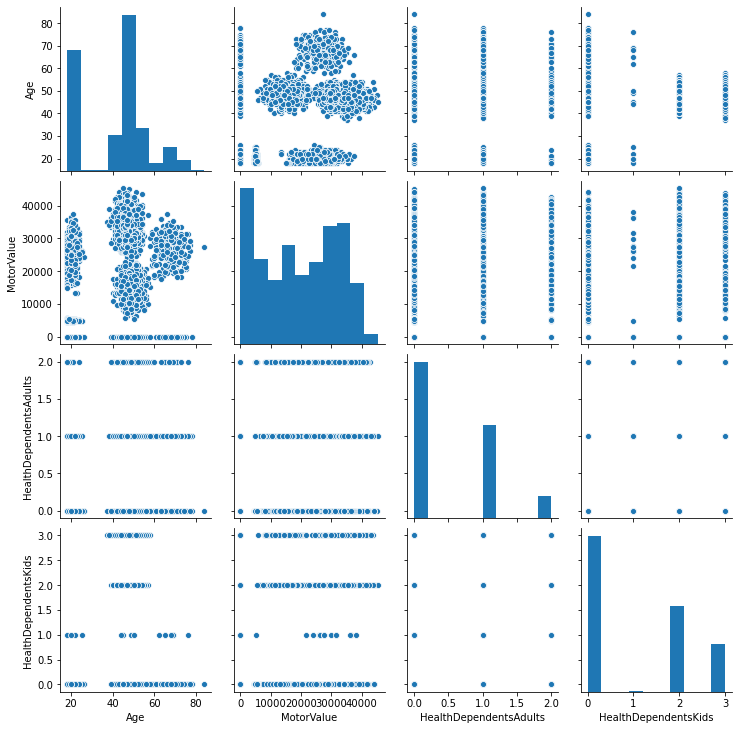

In [9]:
# distribution grah
sns.pairplot(data_cTrain[unob_cols])

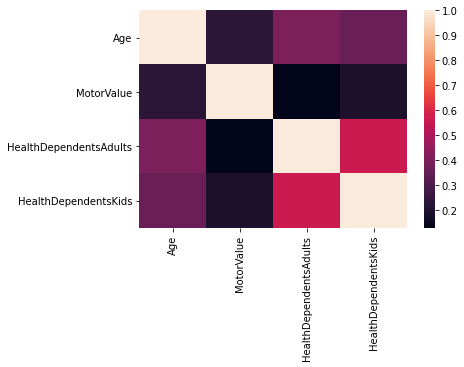

In [14]:
# Corrletionship Hot map
sns.heatmap(data_cTrain.corr())

In [10]:
# relationship between different ategorical variable, Age and MotorValue
object_bool = (data_cTrain.dtypes=='object')
object_cols = list(object_bool[object_bool].index)
print(object_cols)

['CreditCardType', 'Gender', 'Location', 'MotorType', 'HealthType', 'TravelType', 'PrefChannel']


In [11]:
plt.figure(1,figsize=(10,5))
value_feature = input(" Please only type these variable name: CreditCardType, Gender, Location, MotorType, HealthType, TravelType, PrefChannel")

result_value_feature = pd.value_counts(data_cTrain[value_feature])
x = pd.DataFrame(result_value_feature)                     

 Please only type these variable name: CreditCardType, Gender, Location, MotorType, HealthType, TravelType, PrefChannelHealthType


<Figure size 720x360 with 0 Axes>

In [12]:
y = list(x.T)
y

['Nan', 'Level2', 'Level1', 'Level3']

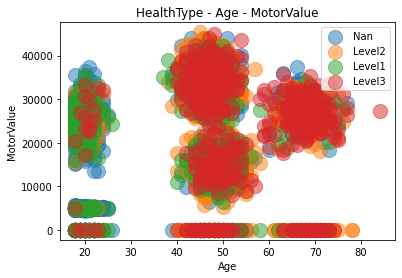

In [13]:
i = value_feature
for i in y:  
    plt.scatter(x='Age',y='MotorValue',data=data_cTrain[data_cTrain[value_feature]==i],
               s=200,alpha=0.5,label=i)
plt.xlabel('Age'),plt.ylabel('MotorValue') 
relationship_title = value_feature+" - Age - MotorValue"
plt.title(relationship_title)
plt.legend() 
plt.show()